In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from urllib import request

#I've imported pandas for data manipulation, matplot for creating plots, and urllib to read in the csv from a URL
#First, to open said URL and read it into a pandas dataframe

rawData = request.urlopen('https://s3.amazonaws.com/cc-analytics-datasets/Building_Permits.csv')
data = pd.read_csv(rawData)

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (17,44,50,55,63,69,72) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
#I'm getting a warning that some columns have mixed data types.  Upon looking at the csv file, I can't identify the issue so 
#I can only assume it's due to formatting issues.  I'll ignore for now unless it causes trouble in the analysis

#Now, to get the number of rows and columns from the data

print ("Rows and Columns, respectively: %a and %a" % data.shape)

Rows and Columns, respectively: 141953 and 87


So, there's 141953 rows(total entries) and 87 columns(total fields) in the dataset.  That's a lot of data!

In [3]:
data.describe()

,X,Y,OBJECTID,permitnum,permitclass,estprojectcost,censuslandusecode,devplanid,cocnbr,contractorlicnum,...,housingunitstotal,housingunitsexist,issueddate_mth,issueddate_yr,landusenewuse,latitude_perm,longitude_perm,numberstories,parc_open_space_zone_fee,totalsqft
count,141830.000000,141830.000000,141953.000000,141953.000000,135408.000000,1.419530e+05,135408.000000,127287.000000,2648.000000,122764.000000,...,118563.000000,77393.000000,138519.000000,138519.000000,135722.000000,141830.000000,141830.000000,122442.000000,141949.000000,1.367010e+05
mean,-78.635798,35.835300,118523.386424,76731.876318,322.068305,1.920127e+05,322.068305,4710.210846,4472.450906,5888.122658,...,2.590707,10.145892,6.407078,2008.795176,262.722875,35.835300,-78.635798,9.707421,2.458552,2.744957e+03
std,0.068805,0.058392,41024.499284,43864.317257,171.086230,1.493678e+06,171.086230,4467.329704,3646.687083,6006.855697,...,205.286034,46.431197,3.245976,5.486947,281.665535,0.058392,0.068805,1114.892012,1.182591,2.160001e+04
min,-78.816616,33.956035,47520.000000,5.000000,100.000000,0.000000e+00,100.000000,0.000000,0.000000,2.000000,...,0.000000,0.000000,1.000000,2000.000000,0.000000,33.956035,-78.816616,0.000000,0.000000,0.000000e+00
25%,-78.681172,35.788197,83008.000000,38924.000000,102.000000,1.000000e+04,102.000000,0.000000,1692.500000,907.000000,...,1.000000,0.000000,4.000000,2004.000000,110.000000,35.788197,-78.681172,1.000000,1.000000,1.400000e+02
50%,-78.637151,35.834122,118496.000000,76739.000000,434.000000,5.440400e+04,434.000000,5528.000000,3334.500000,3189.000000,...,1.000000,1.000000,6.000000,2008.000000,110.000000,35.834122,-78.637151,2.000000,2.000000,1.139000e+03
75%,-78.577937,35.885177,153984.000000,114674.000000,434.000000,1.350000e+05,434.000000,7581.000000,6917.500000,9869.000000,...,1.000000,1.000000,9.000000,2014.000000,153.000000,35.885177,-78.577937,2.000000,4.000000,2.433000e+03
max,-78.490945,35.970246,190277.000000,152586.000000,649.000000,1.700000e+08,649.000000,22611.000000,22034.000000,23356.000000,...,70000.000000,940.000000,12.000000,2018.000000,991.000000,35.970246,-78.490945,342365.000000,4.000000,6.627080e+06


Here's some quick summary statistics on the numerical fields in our data.  But, there's a lot of columns and some of these stats are obviously more useful than others.  Many fields don't seem to tell much, so it'll take some work to parse through the data and find what's useful.  Immediately I can tell that something like OBJECT ID probably doesn't mean anything, while a field such as totalsqft (Total Square Feet) likely correlates with other fields, say, estimated project cost.


How many different types of construction are there in this dataset?

In [4]:
print(data['const_type'].nunique())

18


So, there are 18 different types of construction in the dataset.


What is the mean and median number of stories of the buildings in this data set?

In [5]:
print("Mean: %a" % data['numberstories'].mean())
print("Median: %a" % data['numberstories'].median())

Mean: 9.707420656310743
Median: 2.0


Mean number of stories is 9.7, which is actually higher than I thought it would be.  I guess very tall buildings such as skyscrapers are so far above average in stories that it brings up the average noticeably.  The median number of stories is 2, which makes sense intuitively.

Now, what's the standard deviation for the X and Y coordinates of this dataset?

In [6]:
print("St. Dev for X: %a" % data['X'].std())
print("St. Dev for Y: %a" % data['Y'].std())

St. Dev for X: 0.06880533619261185
St. Dev for Y: 0.05839207500294413


Standard deviation for both X and Y aren't very high; this makes sense as this data is entirely from Raleigh and so one would expect the coordinates to be pretty close together.


For the distributions of Estimated Project Cost and Issue Date Month, I will look at either a histogram or a boxplot:  

Because Estimated Project Cost covers a very large range of values I believe a box plot will fare better than a histogram.
Because the Issue Date Month is only one of twelve categories, I will instead use a histogram to visualize its distribution.

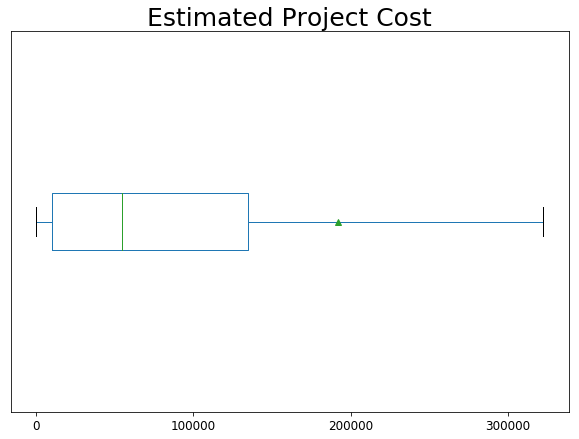

In [7]:
figure1 = data.boxplot(column='estprojectcost', figsize=(10,7), grid=False, sym='',showmeans=True, vert=False)
figure1.set_title('Estimated Project Cost', fontsize=25)
figure1.set_yticks(())
figure1.set_xticks((0,10e4,20e4,30e4))
figure1.tick_params(labelsize=12)

The mean is far above the median for the Estimated Project Cost, indicating that the numbers are right-skewed.  This makes sense; the cost of most projects are going to be somewhat moderate, while the top 25 percent of costs range so high that it brings the mean up.  This aligns with intuition; of course the expensive projects are going to be less numerous and account for less volume of the total values compared to the cheaper and easier to execute projects.

Now for the histogram of issue date months.

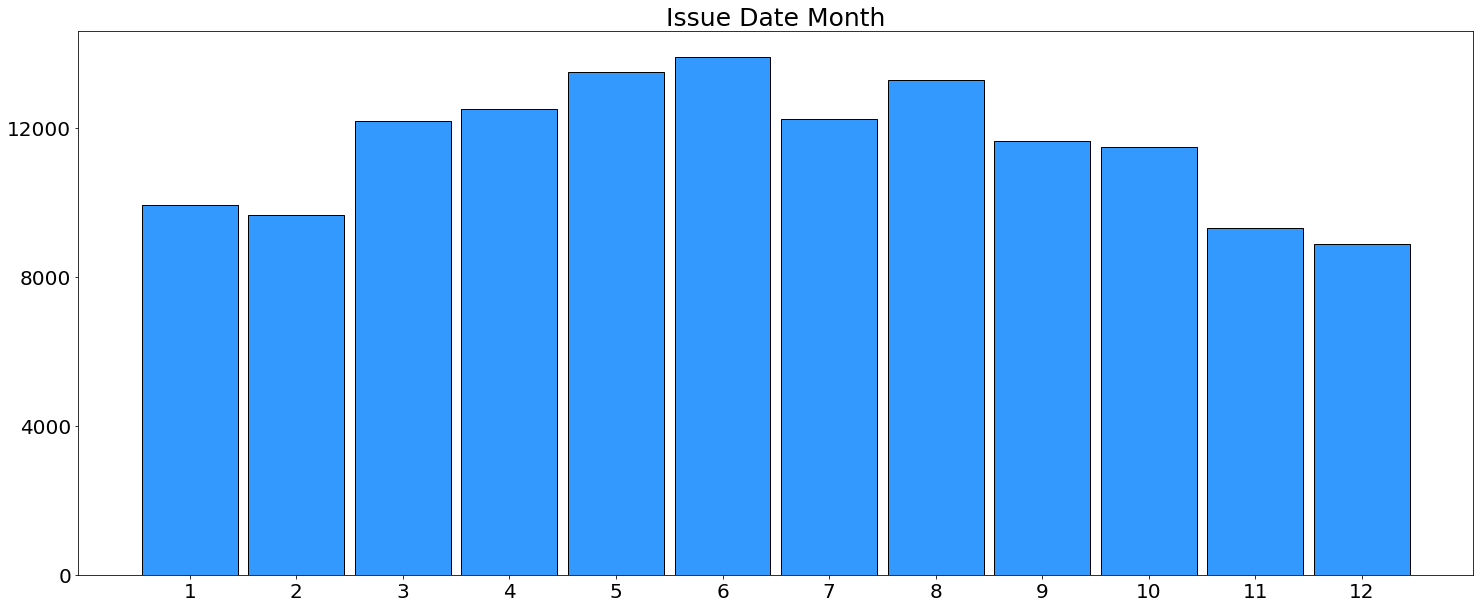

In [8]:
figure2 = data['issueddate_mth'].plot(kind='hist',figsize=(25,10), rwidth=.9, bins=range(1,14), grid=False, color='#3399ff', edgecolor='k',align='left')
figure2.set_title('Issue Date Month', fontsize=25)
figure2.set_ylabel('',)
figure2.set_yticks((0,4000,8000,12000))
figure2.set_xticks((1,2,3,4,5,6,7,8,9,10,11,12))
figure2.tick_params(labelsize=20)

Interestingly, it looks like the number of permits issued increases towards the middle of the year, with an unusual dip in July resulting in a somewhat bimodal distribution.  Despite this odd dip, the amount of permits issued in the first and last two months of the year are clearly less than the rest of the year.  When thinking about it in seasons, winter is the season when we see the least permits being issued, with spring being the most.  Summer comes in second, and autumn is third.  

Perhaps in many areas it becomes hard to survey the land or search for new locations in winter and that results in less permits being applied for to begin with; or maybe for the same reasons it becomes harder for the proper authority to approve permits in the winter.

So it looks like some higher-ups want to see a regression between Permit Issue year and Estimated Project Cost.  Let's get to it!

In [9]:
#First I'll make a new data frame that fits their specifications

data2 = data[(data.workclassmapped=='New') & (data.const_type=='V  B') & (data.numberstories<3) ]
data2.head()

,X,Y,OBJECTID,permittypemapped,permitnum,workclass,permitclass,proposedworkdescription,permitclassmapped,applieddate,...,totalsqft,voiddate,workclassmapped,GlobalID,CreationDate,Creator,EditDate,Editor,const_type,occupancyclass
1,-78.534184,35.729309,48521,Building,147288,New Building,101.0,SFD,Residential,2018-03-02T15:16:37.000Z,...,1684.0,NaN,New,f114dc19-3b62-459b-bd6c-9084162403c8,2018-03-16T01:55:55.663Z,justin.greco@raleighnc.gov_ral,2018-06-12T22:02:31.949Z,OpenData_ral,V B,RESIDENT 3 SFD/DUP
2,-78.534323,35.728595,48522,Building,147287,New Building,101.0,SFD,Residential,2018-03-02T15:08:25.000Z,...,2378.0,NaN,New,d4b182cb-af25-4c3f-92a9-a59d4b82ada3,2018-03-16T01:55:55.663Z,justin.greco@raleighnc.gov_ral,2018-06-13T22:02:40.102Z,OpenData_ral,V B,RESIDENT 3 SFD/DUP
3,-78.531789,35.729794,48523,Building,147286,New Building,101.0,NEW SFD,Residential,2018-03-02T15:00:47.000Z,...,1392.0,NaN,New,ecc76e8c-48d3-4529-a7ae-f1d616592c08,2018-03-16T01:55:55.663Z,justin.greco@raleighnc.gov_ral,2018-06-27T22:02:34.320Z,OpenData_ral,V B,RESIDENT 3 SFD/DUP
4,-78.533914,35.729473,48524,Building,147284,New Building,101.0,NEW SFD,Residential,2018-03-02T14:32:33.000Z,...,1392.0,NaN,New,a1074b43-bc40-4efa-bc7f-a167c351c327,2018-03-16T01:55:55.663Z,justin.greco@raleighnc.gov_ral,2018-06-12T22:02:31.949Z,OpenData_ral,V B,RESIDENT 3 SFD/DUP
9,-78.594252,35.909492,48529,Building,147194,New Building,318.0,"PAVILLION NEAR POOL, GRILLS, SEATING",Residential,2018-02-27T21:31:37.000Z,...,504.0,NaN,New,39eb46ff-e7d2-4c23-95f8-71c4f67b3924,2018-03-16T01:55:55.663Z,justin.greco@raleighnc.gov_ral,2018-04-23T19:46:09.547Z,OpenData_ral,V B,ASSEMBLY 3


In [10]:
#Now to trim it down, I'm going to again copy the dataset to another that will only have the two relevant fields for regression

data3 = data2[['estprojectcost','issueddate_yr']]

#Now let's see how many null values there are in these fields

nullProjectCosts = data3['estprojectcost'].isnull().sum()
nullIssueYear = data3['issueddate_yr'].isnull().sum()
print("Number of null values for Est. Project Costs: %a" % (nullProjectCosts))
print("Number of null values for Issue Year: %a" % (nullIssueYear))
print("Total number of values in modified data: %a" % (data2['estprojectcost'].count()))

Number of null values for Est. Project Costs: 0
Number of null values for Issue Year: 193
Total number of values in modified data: 31044


Thankfully, there are no null values for Estimated Project Costs.  However, there are 193 null values for Permit Issue Year.
The total amount of records in our modified dataset is 31044.  I will opt to simply drop the null value fields, as missing only 193 records will not result in a statistically signifigant difference in regression.  
(Note: Another option is to try and lift the missing value year records out of the issue date if a given record still has that intact.  Looking at the data set it looks like that tends not to be the case; even if it was the case, I don't believe that 193 records out of 31000 would be worth the additional code complexity and programming time.)

In [11]:
data4 = data3.dropna()
nullProjectCosts = data4['estprojectcost'].isnull().sum()
nullIssueYear = data4['issueddate_yr'].isnull().sum()
print("Number of null values for Est. Project Costs: %a" % (nullProjectCosts))
print("Number of null values for Issue Year: %a" % (nullIssueYear))

Number of null values for Est. Project Costs: 0
Number of null values for Issue Year: 0


In [12]:
##Now, let's create our linear regression model

x = data4['issueddate_yr']
y = data4['estprojectcost']
y = y.values.reshape(-1,1)
x = x.values.reshape(-1,1)

lm = linear_model.LinearRegression()
model = lm.fit(x,y)

So now the model is up and running.  First of all, I wonder what the R^2 score is from just this simple linear regression?

In [13]:
print("Score is: %a" %(lm.score(x,y)))

Score is: 0.004787684627756694


This score is...underwhelming to say the least.  I wonder if management chose bad factors to analyze or if something else may be afoot.  Let's see what a scatterplot says.

Text(0.5,0,'Permit Issue Date')

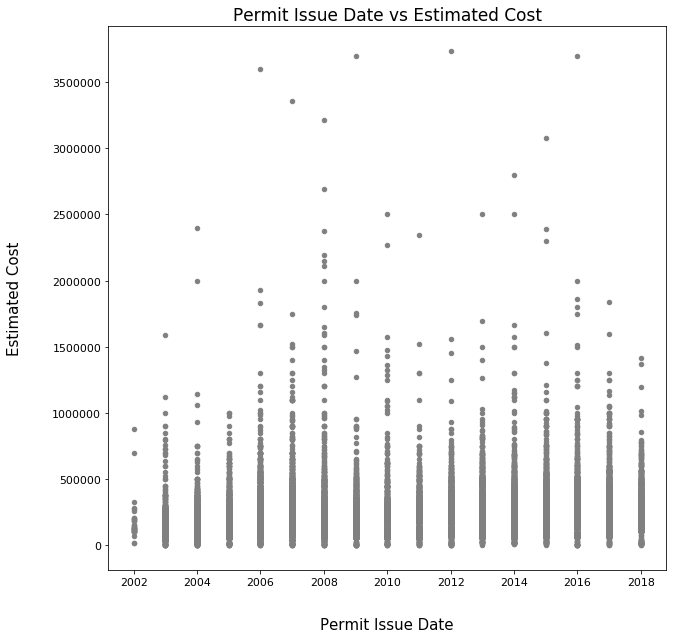

In [14]:
figure3 = data4[(data4.estprojectcost<.4e7)].plot(x='issueddate_yr', y ='estprojectcost', kind = 'scatter', fontsize=11, figsize=(10,10), grid=False, s=20, color='.5')
figure3.set_title('Permit Issue Date vs Estimated Cost', fontsize=17)
figure3.set_ylabel(ylabel='Estimated Cost',fontsize=15, labelpad=30)
figure3.set_xlabel(xlabel='Permit Issue Date', fontsize=15, labelpad=30)

#Note: I decided to remove some outliers from this visualization in order to better show my points.  For my
#purposes, outliers will only obfuscate what I'm trying to show.

So, like the model score implies, a linear model doesn't help a lot with this relationship because it's, well, not linear.  In fact, there seems to be no correlation at all.  However visualizing the plots does give some useful information:

While the actual estimated cost doesn't seem to vary much in relation to the permit issue year, the variance in the estimate cost does.  In 2008 there was a crash in the housing market.  As the plot shows, there was a particularly high amount of variability in estimated costs this year.

In [15]:
#Let's look numerically at the variance across these years:
for i in range(2002, 2019):
    yearStd = data4[(data4.issueddate_yr==i)]
    print(i," St. Deviation: %a" % (yearStd['estprojectcost'].std()))

2002  St. Deviation: 162485.95770959655
2003  St. Deviation: 110308.52203062645
2004  St. Deviation: 89037.32210121654
2005  St. Deviation: 92140.11679036432
2006  St. Deviation: 197623.62361647794
2007  St. Deviation: 161781.29888125576
2008  St. Deviation: 3658584.9692149325
2009  St. Deviation: 362958.56492718816
2010  St. Deviation: 353863.5816085823
2011  St. Deviation: 176135.41138994458
2012  St. Deviation: 187952.64650298646
2013  St. Deviation: 223489.92466586444
2014  St. Deviation: 256992.4311758892
2015  St. Deviation: 216477.92254093333
2016  St. Deviation: 221221.87433983272
2017  St. Deviation: 195485.83499104265
2018  St. Deviation: 155966.2600790397


As you can see, the standard deviation for Estimated Cost is much higher in 2008 than any other year from 2002-2012.  The years directly after '08 are also much higher than the rest of the years.  So, I wonder if one could use variability of Estimated Cost of building projects to predict if the economy is in a recession?  This is a novel idea, however I do doubt it.

The data set I am analyzing has been broken down to New buildings that have less than 2 stories as well as a construction type of V B (though admittedly I'm not sure what that means).  So the housing bubble that bursted at this time would be very represented in 2008 and probably is the reason for the high variability.  I'd imagine other types of buildings, though likely still high in variance, wouldn't be quite as extreme.


Overall, I would tell whomever I'm reporting to that the correlation between estimated project cost and year is virtually nonexistant.  Instead, the variability is what really changes throughout the years, notably coinciding with the 2008 recession.  More variability in estimated costs can point to higher risks in undertaking a project for both the investor and the undertaker; but most would agree that it's intuitive that recessions are riskier times for all.